In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.utils import np_utils
# from keras import backend as K

In [2]:
seed = 8
np.random.seed(seed)

# Dataset:

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
X_train = X_train.reshape(X_train.shape[0],28,28,1).astype('float32')
X_test=X_test.reshape(X_test.shape[0],28,28,1).astype('float32')
inp_shape=(28,28,1)
Y_train = np_utils.to_categorical(Y_train,10)
Y_test = np_utils.to_categorical(Y_test,10)
X_train/=255.0
X_test/=255.0
nc = Y_test.shape[1]

# Model:

In [7]:
model = Sequential()
model.add(Conv2D(32, (5,5), input_shape = (28,28,1), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
          
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 10, batch_size = 200)

Epoch 1/10
300/300 [==============================] - 10s 9ms/step - loss: 0.3655 - accuracy: 0.8864 - val_loss: 0.0774 - val_accuracy: 0.9757
Epoch 2/10
300/300 [==============================] - 2s 6ms/step - loss: 0.0899 - accuracy: 0.9729 - val_loss: 0.0458 - val_accuracy: 0.9853
Epoch 3/10
300/300 [==============================] - 2s 6ms/step - loss: 0.0631 - accuracy: 0.9805 - val_loss: 0.0364 - val_accuracy: 0.9882
Epoch 4/10
300/300 [==============================] - 2s 5ms/step - loss: 0.0542 - accuracy: 0.9830 - val_loss: 0.0337 - val_accuracy: 0.9888
Epoch 5/10
300/300 [==============================] - 2s 5ms/step - loss: 0.0459 - accuracy: 0.9859 - val_loss: 0.0285 - val_accuracy: 0.9907
Epoch 6/10
300/300 [==============================] - 2s 5ms/step - loss: 0.0392 - accuracy: 0.9875 - val_loss: 0.0284 - val_accuracy: 0.9913
Epoch 7/10
300/300 [==============================] - 2s 5ms/step - loss: 0.0359 - accuracy: 0.9885 - val_loss: 0.0215 - val_accuracy: 0.9926
Epoch

# Evaluation and Testing:

In [10]:
#Evaluation
ev = model.evaluate(X_test, Y_test, verbose=0)
print("CNN Error: %.2f%%" % (100 - ev[1]*100))

CNN Error: 0.69%


Test images shape: (4, 28, 28)
Predicted digit: [1.0475094e-06 6.5935740e-07 9.9999833e-01 1.6935626e-12 4.7717202e-10
 2.4552156e-15 3.5338088e-09 7.0070277e-10 2.5065949e-10 5.0487652e-13]
Predicted digit: [1.5518341e-07 9.9995363e-01 4.0033365e-06 1.0789414e-08 1.8694700e-05
 2.2676581e-08 1.3082087e-06 2.1266454e-05 7.8533589e-07 1.7259045e-07]
Predicted digit: [9.9999785e-01 3.3934476e-13 1.4458586e-08 9.5930430e-10 1.5750306e-08
 8.3129976e-08 1.6928176e-06 3.4211514e-10 9.0874771e-08 2.3625559e-07]
Predicted digit: [7.7564138e-08 5.2869387e-10 1.4466057e-08 9.3751749e-11 9.9998033e-01
 2.3047737e-09 1.0528847e-08 1.3399941e-07 5.4444381e-08 1.9393599e-05]


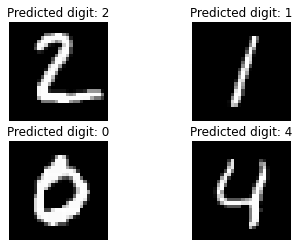

In [16]:
#Testing
test_images = X_test[1:5]
test_images = test_images.reshape(test_images.shape[0], 28, 28)
print ("Test images shape: {}".format(test_images.shape))

for i, test_image in enumerate(test_images, start=1):
    org_image = test_image
    test_image = test_image.reshape(1,28,28,1)
    prediction = model.predict(test_image, verbose=0)

    print ("Predicted digit: {}".format(prediction[0]))
    plt.subplot(220+i)
    plt.axis('off')
    plt.title("Predicted digit: {}".format(np.argmax(prediction[0])))
    plt.imshow(org_image, cmap=plt.get_cmap('gray'))

plt.show()

# Saving Model:

In [17]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Model Saved")

Model Saved
